In [1]:
#basic libraries
import pandas as pd
import numpy as np
from math import *

#graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#system libraries
import os
import statistics
from datetime import datetime

#sklearn
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#tensorflow
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

#keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#reading in the dataset
test = pd.read_csv("digit-recognizer/test.csv")
train = pd.read_csv("digit-recognizer/train.csv")

# Cleaning the data

#### Checking for NULLS

In [3]:
test.isnull().values.any()

False

In [4]:
train.isnull().values.any()

False

There are no missing values in either datasets. If there were, we would have filled it with the average value of the datasets

# Fitting, Scaling and Splitting the Data into Train and Test Data

In [5]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Users\kerry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

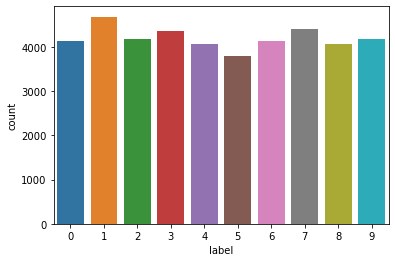

In [7]:
sns.countplot(train['label'])

Text(0.5, 1.0, 'Number 0')

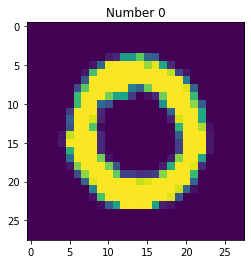

In [8]:
#to show the numbers. This is pretty cool 
zero = train.iloc[1, 1:] #for the first column
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Number 0")

In [9]:
#time for the train test split
x = train.iloc[:, train.columns != 'label']
y = train["label"]

#scale
scaler = StandardScaler()
xScale = scaler.fit_transform(x)

#ok if i don't scale, this is fine
#split 
x_train, x_test, y_train, y_test = train_test_split(xScale, y, test_size = 0.25, random_state=45931)

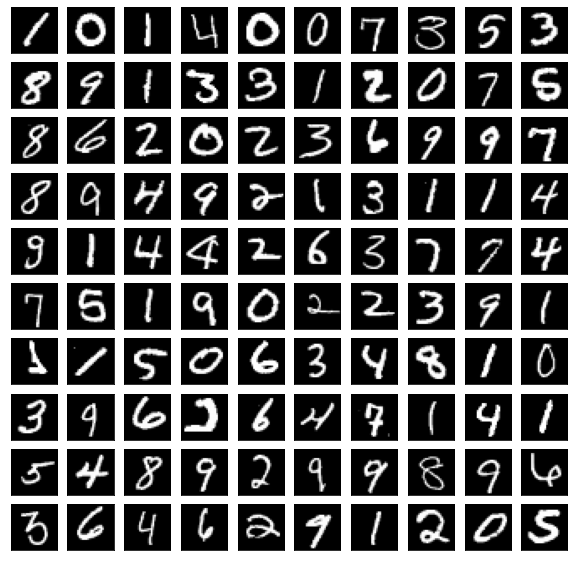

In [11]:
#other visualization
plt.figure(figsize =(10, 10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train.drop('label', axis = 1))[i].reshape(28,28), cmap = 'gray')
plt.show()

# Support Vector Machine

In [12]:
#library ahoy
model = SVC(kernel = "linear")

#fit the code into SVC
model.fit(x_train,y_train)

#predict
y_pred = model.predict(x_test)

In [13]:
#results
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test,y_pred))

Accuracy: 0.9200952380952381
Root Mean Squared Error: 1.3564761904761904


So we have an accuracy score with 92% using Support Vector Model  
RMSE of 1.35  

# Convoluted Neural Networks

# K Nearest Neighbor

# Artificial Neural Networks

In [14]:
# Defining the Neural Network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [16]:
# compiling the model with the loss function
# ref-https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [17]:
# predicting the test labels given the tset dataset.
Y_predict = model.predict(test)
Y_predict = np.argmax(Y_predict, axis=1)

In [19]:
print("Accuracy of ANN:", accuracy_score(test,Y_predict))
print("Root Mean Squared Error of ANN:", mean_squared_error(test,Y_predict))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

**Submission of ANN to Kaggle** 

In [ ]:
# ref -https://stackoverflow.com/questions/34864695/saving-prediction-results-to-csv
# prediction = pd.DataFrame(Y_predict).to_csv('prediction.csv')


# Saving predictions as CSV file to submit
# to submit the prediction to kaggle we need to rename the index column  
# Also increament the index value by 1 as submission starts index start from 1 to 28000
# incremented in above cell



# res = pd.DataFrame(Y_predict)
# res.index = test.index + 1 # its important for comparison
# res.columns = ["Label"]
# res.index.rename('ImageId', inplace = True)
# res.to_csv("prediction_results.csv")

# Gradient Descent Back Propogation

# Confusion Matrix

# Performance Metrics